In [1]:
!pip install transformers datasets --upgrade

     |████████████████████████████████| 3.4 MB 11.3 MB/s 
     |████████████████████████████████| 306 kB 35.0 MB/s 
     |████████████████████████████████| 3.3 MB 46.2 MB/s 
     |████████████████████████████████| 895 kB 43.9 MB/s 
     |████████████████████████████████| 596 kB 46.1 MB/s 
     |████████████████████████████████| 61 kB 409 kB/s 
     |████████████████████████████████| 1.1 MB 34.0 MB/s 
     |████████████████████████████████| 243 kB 42.2 MB/s 
     |████████████████████████████████| 132 kB 39.3 MB/s 
     |████████████████████████████████| 192 kB 40.8 MB/s 
     |████████████████████████████████| 271 kB 38.6 MB/s 
     |████████████████████████████████| 160 kB 42.1 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [177]:
from transformers import ViTFeatureExtractor, TFViTForImageClassification
import tensorflow as tf
from PIL import Image
import requests

url = 'http://images.cocodataset.org/val2017/000000039769.jpg'
image = Image.open(requests.get(url, stream=True).raw)

feature_extractor = ViTFeatureExtractor.from_pretrained('google/vit-base-patch16-224')
model = TFViTForImageClassification.from_pretrained('google/vit-base-patch16-224')

inputs = feature_extractor(images=image, return_tensors="tf")
outputs = model(**inputs)
logits = outputs.logits
# model predicts one of the 1000 ImageNet classes
predicted_class_idx = tf.math.argmax(logits, axis=-1)[0]
print("Predicted class:", model.config.id2label[int(predicted_class_idx)])

All model checkpoint layers were used when initializing TFViTForImageClassification.

All the layers of TFViTForImageClassification were initialized from the model checkpoint at google/vit-base-patch16-224.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFViTForImageClassification for predictions without further training.


Predicted class: Egyptian cat


In [8]:
!wget https://madm.dfki.de/files/sentinel/EuroSAT.zip
!unzip EuroSAT.zip

--2021-12-29 16:40:29--  https://madm.dfki.de/files/sentinel/EuroSAT.zip
Resolving madm.dfki.de (madm.dfki.de)... 131.246.195.183
Connecting to madm.dfki.de (madm.dfki.de)|131.246.195.183|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 94280567 (90M) [application/zip]
Saving to: ‘EuroSAT.zip’

EuroSAT.zip         100%[===================>]  89.91M  27.2MB/s    in 3.9s    

2021-12-29 16:40:33 (23.2 MB/s) - ‘EuroSAT.zip’ saved [94280567/94280567]



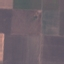

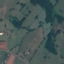

In [12]:
from IPython.display import Image, display
display(Image('/content/2750/AnnualCrop/AnnualCrop_1.jpg'))
display(Image('/content/2750/Pasture/Pasture_10.jpg'))

In [3]:
import tensorflow as tf

tf.__version__

'2.7.0'

In [4]:
from transformers import AutoTokenizer, TFAutoModelForSequenceClassification, DataCollatorWithPadding, create_optimizer
from datasets import load_dataset
import tensorflow as tf

model = TFAutoModelForSequenceClassification.from_pretrained("distilbert-base-uncased")
tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased")

# Load DatasetDict
dataset = load_dataset("emotion")

# Preprocess train dataset
def preprocess_function(examples):
    return tokenizer(examples["text"], truncation=True)

encoded_dataset = dataset.map(preprocess_function, batched=True)

# define tokenizer_columns
# tokenizer_columns is the list of keys from the dataset that get passed to the TensorFlow model

# convert to TF datasets
data_collator = DataCollatorWithPadding(tokenizer=tokenizer, return_tensors="tf")
encoded_dataset["train"] = encoded_dataset["train"].rename_column("label", "labels")
tf_train_dataset = encoded_dataset["train"].to_tf_dataset(
    columns= ["attention_mask", "input_ids","labels"],
    # label_cols=["labels"],
    shuffle=True,
    batch_size=8,
    collate_fn=data_collator,
)


num_train_steps = len(tf_train_dataset) * 1
optimizer, _ = create_optimizer(init_lr=3e-5, num_warmup_steps=0, num_train_steps=num_train_steps)

loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
metrics = [tf.keras.metrics.SparseCategoricalAccuracy()]

model.compile(optimizer=optimizer,
              # loss=loss,
              metrics=metrics)

train_results = model.fit(
    tf_train_dataset,
    epochs=1
    )



Some layers from the model checkpoint at distilbert-base-uncased were not used when initializing TFDistilBertForSequenceClassification: ['activation_13', 'vocab_transform', 'vocab_projector', 'vocab_layer_norm']
- This IS expected if you are initializing TFDistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some layers of TFDistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['pre_classifier', 'dropout_79', 'classifier']
You should probably TRAIN this model on a down-stream task to be able to use i

  0%|          | 0/3 [00:00<?, ?it/s]

Loading cached processed dataset at /root/.cache/huggingface/datasets/emotion/default/0.0.0/348f63ca8e27b3713b6c04d723efe6d824a56fb3d1449794716c0f0296072705/cache-1b9cf1cea89d1d35.arrow
Loading cached processed dataset at /root/.cache/huggingface/datasets/emotion/default/0.0.0/348f63ca8e27b3713b6c04d723efe6d824a56fb3d1449794716c0f0296072705/cache-9c412c019243e8d0.arrow
Loading cached processed dataset at /root/.cache/huggingface/datasets/emotion/default/0.0.0/348f63ca8e27b3713b6c04d723efe6d824a56fb3d1449794716c0f0296072705/cache-11e752bc5b5014c2.arrow
No loss specified in compile() - the model's internal loss computation will be used as the loss. Don't panic - this is a common way to train TensorFlow models in Transformers! Please ensure your labels are passed as the 'labels' key of the input dict so that they are accessible to the model during the forward pass. To disable this behaviour, please pass a loss argument, or explicitly pass loss=None if you do not want your model to compute

ValueError: ignored

In [11]:
train_tf_ds

<PrefetchDataset shapes: {labels: (8,), pixel_values: (8, 3, 224, 224)}, types: {labels: tf.int64, pixel_values: tf.float32}>

In [2]:
from transformers import ViTFeatureExtractor
from datasets import load_dataset
import numpy as np
from PIL import Image
from random import randint

# dataset used
dataset_name = 'cifar10'

# FeatureExtractor used in preprocessing
model_name = 'google/vit-base-patch16-224-in21k'

feature_extractor = ViTFeatureExtractor.from_pretrained(model_name)

# load dataset
train_dataset, test_dataset = load_dataset(dataset_name, 
                                           split=['train[:5000]', 'test[:2000]'])


train_dataset = train_dataset.rename_column("label", "labels")
test_dataset = test_dataset.rename_column("label", "labels")

# display random sample
sample_image = np.array(train_dataset[randint(0, 2000)]["img"],dtype="uint8")

Image.fromarray(sample_image)

from datasets import Features, Array3D

# we need to extend the features 
features = Features({
    **train_dataset.features,
    'pixel_values': Array3D(dtype="float32", shape=(3, 224, 224)),
})

# extractor helper function
def preprocess_images(examples):
    # get batch of images
    images = examples['img']
    # convert to list of NumPy arrays of shape (C, H, W)
    images = [np.array(image, dtype=np.uint8) for image in images]
    images = [np.moveaxis(image, source=-1, destination=0) for image in images]
    # preprocess and add pixel_values
    inputs = feature_extractor(images=images)
    examples['pixel_values'] = inputs['pixel_values']

    return examples

def process(examples):
    examples.update(feature_extractor(examples['img'], ))
    return examples

# preprocess dataset
train_dataset = train_dataset.map(process, batched=True,features=features)
test_dataset = test_dataset.map(process, batched=True,features=features)



Downloading:   0%|          | 0.00/160 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.55k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/799 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/170M [00:00<?, ?B/s]

0 examples [00:00, ? examples/s]

0 examples [00:00, ? examples/s]

Dataset cifar10 downloaded and prepared to /root/.cache/huggingface/datasets/cifar10/plain_text/1.0.0/7cc98527296ba6b416e709858ac23013f8e6b0201b1d8bb088fb4071379806ca. Subsequent calls will reuse this data.


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?ba/s]

  0%|          | 0/2 [00:00<?, ?ba/s]

In [3]:
from transformers import DefaultDataCollator

data_collator = DefaultDataCollator(return_tensors="tf")

train_tf_ds = train_dataset.to_tf_dataset(
   columns=['pixel_values'],
   label_cols=["labels"],
   shuffle=True,
   batch_size=32,
   collate_fn=data_collator)

test_tf_ds = test_dataset.to_tf_dataset(
   columns=['pixel_values'],
   label_cols=["labels"],
   shuffle=True,
   batch_size=32,
   collate_fn=data_collator)

In [4]:
train_tf_ds

<PrefetchDataset shapes: ((32, 3, 224, 224), (32,)), types: (tf.float32, tf.int64)>

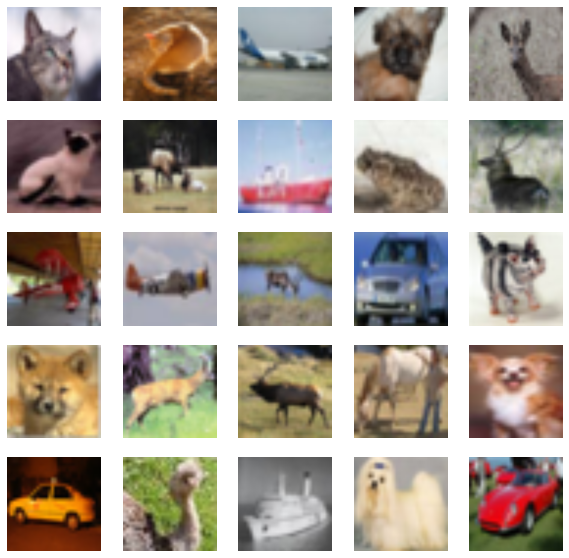

In [5]:
import matplotlib.pyplot as plt


sample_images,_ = next(iter(train_tf_ds))
plt.figure(figsize=(10, 10))
for n in range(25):
    ax = plt.subplot(5, 5, n + 1)
    plt.imshow((sample_images[n].numpy().transpose((1, 2, 0)) + 1) / 2)
    plt.axis("off")
plt.show()

In [6]:
from transformers import create_optimizer,TFViTForImageClassification
import tensorflow as tf

labels = train_dataset.features["labels"].names

model = TFViTForImageClassification.from_pretrained('google/vit-base-patch16-224-in21k',num_labels=len(labels))

model.summary()

Downloading:   0%|          | 0.00/502 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/330M [00:00<?, ?B/s]

Some layers from the model checkpoint at google/vit-base-patch16-224-in21k were not used when initializing TFViTForImageClassification: ['vit/pooler/dense/bias:0', 'vit/pooler/dense/kernel:0']
- This IS expected if you are initializing TFViTForImageClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFViTForImageClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some layers of TFViTForImageClassification were not initialized from the model checkpoint at google/vit-base-patch16-224-in21k and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Model: "tf_vi_t_for_image_classification"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vit (TFViTMainLayer)        multiple                  85798656  
                                                                 
 classifier (Dense)          multiple                  7690      
                                                                 
Total params: 85,806,346
Trainable params: 85,806,346
Non-trainable params: 0
_________________________________________________________________


In [7]:
num_train_steps = len(train_tf_ds) * 1
optimizer, _ = create_optimizer(init_lr=3e-5, num_warmup_steps=0, num_train_steps=num_train_steps)

loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
metrics=[
    tf.keras.metrics.SparseCategoricalAccuracy(name="accuracy"),
    tf.keras.metrics.SparseTopKCategoricalAccuracy(5, name="top-5-accuracy"),
]

model.compile(optimizer=optimizer,
              loss=loss,
              metrics=metrics
              )

train_results = model.fit(
    train_tf_ds,
    validation_data=test_tf_ds,
    epochs=1
    )

156/156 [==============================] - 469s 3s/step - loss: 1.6031 - accuracy: 0.8578 - top-5-accuracy: 0.9714 - val_loss: 1.2067 - val_accuracy: 0.9577 - val_top-5-accuracy: 1.0000


In [11]:
import tensorflow as tf
from transformers import TFViTModel

base_model = TFViTModel.from_pretrained('google/vit-base-patch16-224-in21k')


# inputs
pixel_values = tf.keras.layers.Input(shape=(3,224,224), name='pixel_values', dtype='float32')

# model layer
vit = base_model.vit(pixel_values)[0]
classifier = tf.keras.layers.Dense(10, activation='softmax', name='outputs')(vit[:, 0, :])

# model
model = tf.keras.Model(inputs=pixel_values, outputs=classifier)


# # TF HUB Example: https://colab.research.google.com/github/sayakpaul/ViT-jax2tf/blob/main/fine_tune.ipynb#scrollTo=jk5VZIafSxGv

# model = tf.keras.Sequential(
#     [tf.keras.layers.Input(shape=(3,224,224)),
#     base_model.vit,
#     tf.keras.layers.Dense(10,activation="softmax")],
# )
# ValueError: All layers in a Sequential model should have a single output tensor. For multi-output layers, use the functional API.


All model checkpoint layers were used when initializing TFViTModel.

All the layers of TFViTModel were initialized from the model checkpoint at google/vit-base-patch16-224-in21k.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFViTModel for predictions without further training.


In [20]:
num_train_steps = len(train_tf_ds) * 1
optimizer, _ = create_optimizer(init_lr=3e-5, num_warmup_steps=0, num_train_steps=num_train_steps)

loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
metrics=[
    tf.keras.metrics.SparseCategoricalAccuracy(name="accuracy"),
    tf.keras.metrics.SparseTopKCategoricalAccuracy(5, name="top-5-accuracy"),
]

model.compile(optimizer=optimizer,
              loss=loss,
              metrics=metrics
              )

train_results = model.fit(
    train_tf_ds,
    validation_data=test_tf_ds,
    epochs=1
    )

/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1096: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


 29/156 [====>.........................] - ETA: 4:59 - loss: 1.9913 - accuracy: 0.4914 - top-5-accuracy: 0.8157

KeyboardInterrupt: ignored